In [2]:
#Importing required libraries

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import pandas as pd
print(pd.__version__)

import os


0.18.1


In [4]:
#Reading Titanic Train and Test Datasets! 

titanic_train = pd.read_csv("C:/Users/arjun/Desktop/train.csv")

titanic_test = pd.read_csv("C:/Users/arjun/Desktop/test.csv")

tdata = pd.concat([titanic_train,titanic_test],ignore_index=True)

In [63]:
titanic_train.shape 

(891, 12)

In [64]:
titanic_test.shape

(418, 11)

In [65]:


titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [66]:
# Variable Description​¶
# Header Name	Descriptions
# Survived	Survival (0 = No; 1 = Yes)
# Pclass	Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# Name	Name
# Sex	Sex
# Age	Age
# SibSp	Number of Siblings/Spouses Aboard
# Parch	Number of Parents/Children​ Aboard
# Ticket	Ticket Number
# Fare	Passenger Fare
# Cabin	Cabin
# Embarked	Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [67]:
print(titanic_train.head(6))
# Checking the first 6 rows

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN       

### checking the Data set

In [68]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [69]:
titanic_train.describe()

C:\Users\arjun\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
# Finding the Information about the dataset.
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [71]:
titanic_train.isnull().sum()
#gives sum of all null values, i.e; age=177 missing values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
titanic_train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

titanic_test.isnull().sum()

In [73]:
# droping unnecessary columns, which won't be useful in analysis and prediction

titanic_train = titanic_train.drop(['Name','Ticket', 'Cabin'] ,axis=1)
titanic_test = titanic_test.drop(['Name','Ticket'], axis=1)

In [74]:
titanic_train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [75]:
#del titanic_train["Cabin"] 

In [76]:
titanic_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [77]:
titanic_train['Survived'].mean()

0.3838383838383838

In [78]:
titanic_train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


### Survival

In [79]:
print ('Percentage of survivors:',(survived_ratio*100).round(1),'%')

Percentage of survivors: 38.4 %


In [80]:
#Survived Ratio
total_passengers = titanic_train['Survived'].count()
survived_passengers = titanic_train['Survived'].sum()
survived_ratio = survived_passengers/total_passengers


# A horizontal line of average survival rate

def avg_survived(survived_ratio):
    print(plt.axhline(y=survived_ratio,ls=":", c='.5'))
    print(plt.legend(['Avg. survival rate'],loc='center right'))

print ('Percentage of survivors:',(survived_ratio*100).round(1),'%')

Percentage of survivors: 38.4 %


In [81]:
titanic_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [102]:
titanic_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


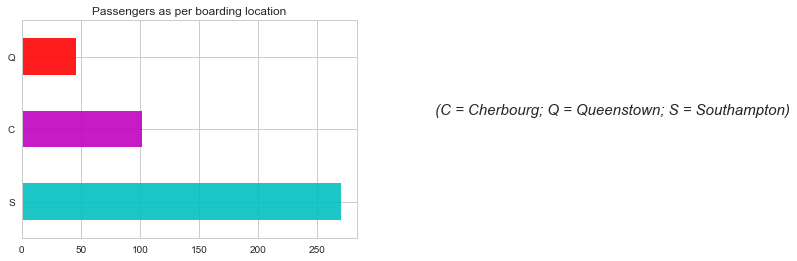

In [82]:
#Embarkment_1



#Embarkment count as per boarding place!
titanic_test.Embarked.value_counts().plot(color='cmr',kind='barh', alpha=0.89)
plt.title("Passengers as per boarding location")
plt.text(350, 1.2, '(C = Cherbourg; Q = Queenstown; S = Southampton)', style='italic',fontsize=15)

Lets analyse Embarkment now!


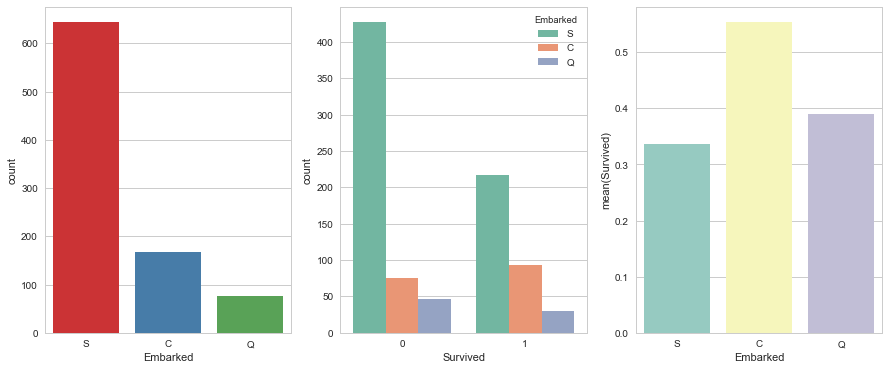

In [103]:
#Embarkment_2

print('Lets analyse Embarkment now!')

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,6))


sns.countplot(x='Embarked', data=titanic_train, ax=axis1,  palette="Set1")
sns.countplot(x='Survived', hue="Embarked", data=titanic_train, order=[0,1], ax=axis2, palette="Set2")


# **group by embarked, and get the mean for survived passengers for each value in Embarked**
embark_class = titanic_train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_class, order=['S','C','Q'],ax=axis3, palette="Set3")

### AGE 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3800A4A90>]], dtype=object)

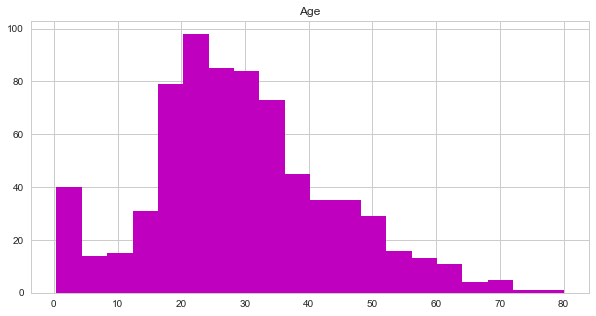

In [84]:
#Age_1 

#Before modifying age NaN values!


#as the Age has migging values, lets see a histogram to understand the pattern with age.

titanic_train.hist(column='Age', figsize=(10,5), bins = 20, color='m')



In [85]:
#Age_2

print('From this histogram, we deduce that ages between 20 and 30 are in more number, so filling by median wouldnt make huge difference.')

titanic_train["Age"].describe()

From this histogram, we deduce that ages between 20 and 30 are in more number, so filling by median wouldnt make huge difference.


C:\Users\arjun\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

In [86]:
#Age_2.1

titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)

titanic_train.isnull().sum()
# replacing the null values with the median age which is more robust to outliers than the mean.

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3FE208668>]], dtype=object)

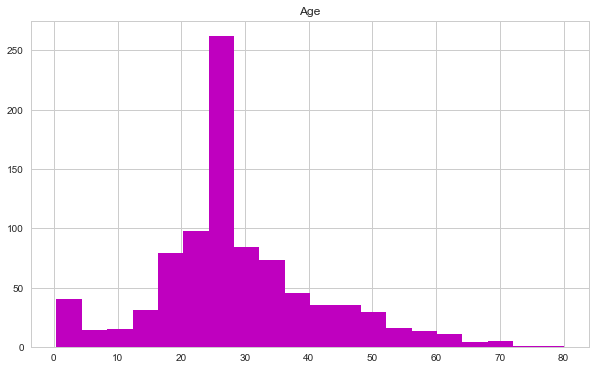

In [87]:
#Age_3 

#After modifying age NaN values!

titanic_train.hist(column='Age', figsize=(10,6), bins = 20,color='m' )

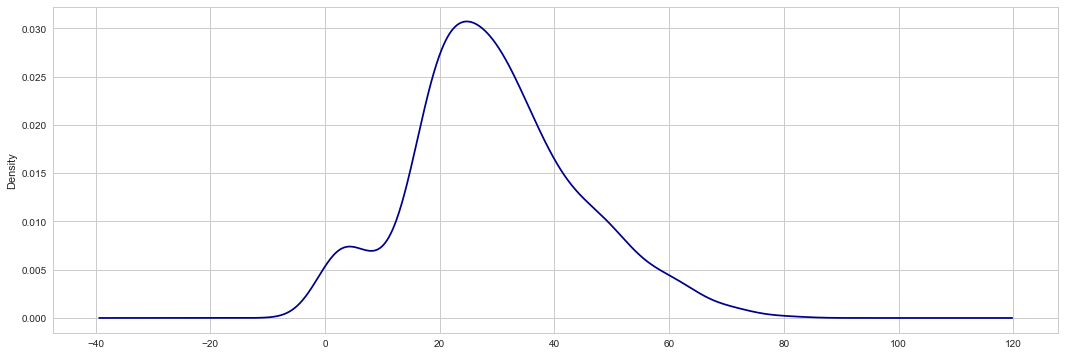

In [45]:
titanic_train.Age.plot(kind='kde',figsize=(18, 6),color='darkblue')

#### Fare by Age

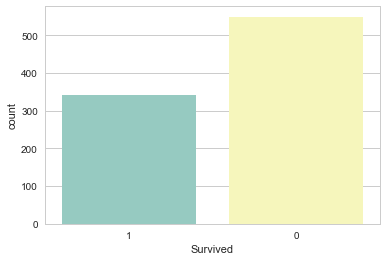

In [89]:
# Survival Count.

sns.countplot(x="Survived", order=[1,0],data=titanic_train, palette="Set3")
## print('Survived')


### Survival by Age!

In [144]:
# Create a graph that groups, counts and check survivors per group
def survival_rate(column,t):
    df=pd.DataFrame()
    df['total']=titanic_train.groupby(column).size()
    df['survived'] = titanic_train.groupby(column).sum()['Survived']
    df['percentage'] = round(df['survived']/df['total']*100,2)
    print(df)
    
# If age is less than 1, we return 1. Else, we return the original age.
def normalize_age_below_one(age):
    if age < 1:
        return 1
    else:
        return age
    
# Group ages in buckets
def group_age(value):
    if value <= 10:
        return "0-10"
    elif value <= 20:
        return "10-20"
    elif value <= 30:
        return "20-30"
    elif value <= 40:
        return "30-40"
    elif value <= 50:
        return "40-50"
    elif value <= 60:
        return "50-60"
    elif value <= 70:
        return "60-70"
    elif value <= 80:
        return "70-80"
    elif value <= 90:
        return "80-90"
    else:
        return "No data"


print("*** Number of people with age less than 1 (months):")
print(titanic_train[titanic_train["Age"] < 1.0].shape[0])

# Those with age <1, changed to 1
tdata['Age'] = tdata['Age'].apply(normalize_age_below_one)

# Create new feature with data in buckets
tdata["AgeGroup"] = tdata["Age"].apply(group_age)
titanic_train["AgeGroup"] = titanic_train["Age"].apply(group_age)

# Draw survival per age group
survival_rate("AgeGroup","bar")

*** Number of people with age less than 1 (months):
7
          total  survived  percentage
AgeGroup                             
0-10         64        38       59.38
10-20       115        44       38.26
20-30       230        84       36.52
30-40       155        69       44.52
40-50        86        33       38.37
50-60        42        17       40.48
60-70        17         4       23.53
70-80         5         1       20.00
No data     177        52       29.38


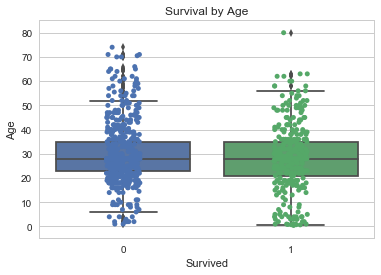

In [90]:
ax = sns.boxplot(x="Survived", y="Age", 
                 data=titanic_train)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic_train, jitter=True,
                   edgecolor="blue")
sns.plt.title("Survival by Age",fontsize=12)

### Mean Survival with Age!

C:\Users\arjun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


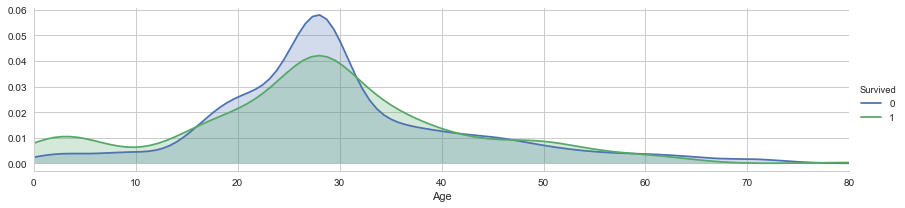

In [91]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_train['Age'].max()))
facet.add_legend()


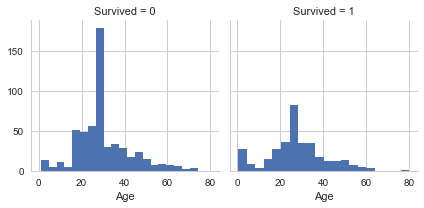

In [106]:
g = sns.FacetGrid(titanic_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Pclass analysis!

#### Pclass_1

In [92]:


print('Pclass: class played crucial role in survival, lets see which class survied the most? ')
print('Lets check the mean.')

titanic_train['Survived'].groupby(titanic_train['Pclass']).mean()


Pclass: class played crucial role in survival, lets see which class survied the most? 
Lets check the mean.


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

#### Pclass_2

This shows half of the people are from 3rd class


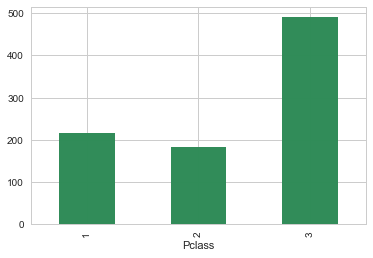

In [137]:
#**Pclass passengers count**

Gp1= titanic_train.groupby('Pclass').PassengerId.count()
Gp1.plot(kind='bar', color='seagreen', alpha=0.99)

print('This shows half of the people are from 3rd class')

#### Pclass_3 

Pclass: Passenger Class(1 = 1st; 2 = 2nd; 3 = 3rd)


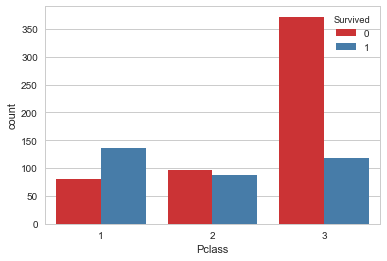

In [141]:



#Pclass survival plot.

sns.countplot(titanic_train['Pclass'], hue= titanic_train['Survived'], palette='Set1')

# fig, (axis2) = plt.subplots(10,figsize=(5,20))
print('Pclass: Passenger Class(1 = 1st; 2 = 2nd; 3 = 3rd)')

In [143]:
# survival per Class
survival_rate("Pclass","barh")

        total  survived  percentage
Pclass                             
1         216       136       62.96
2         184        87       47.28
3         491       119       24.24


### Age distibution within Classes!

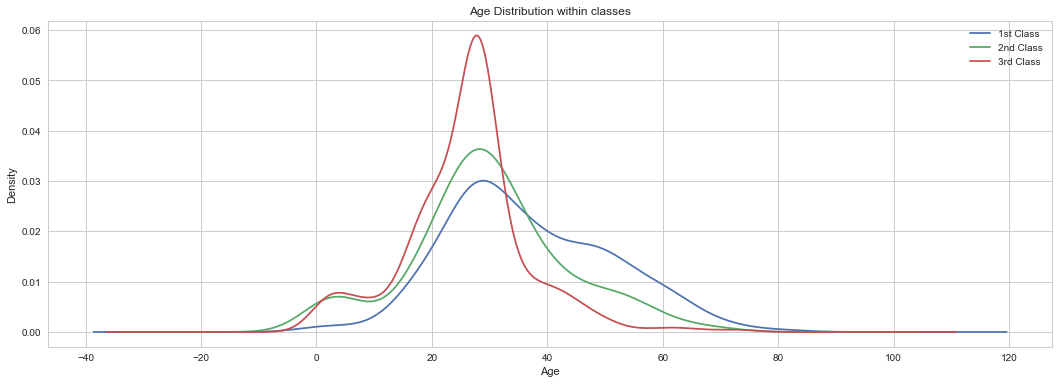

In [95]:
titanic_train.Age[titanic_train.Pclass == 1].plot(kind='kde',figsize=(18, 6))    
titanic_train.Age[titanic_train.Pclass == 2].plot(kind='kde',figsize=(18, 6))
titanic_train.Age[titanic_train.Pclass == 3].plot(kind='kde',figsize=(18, 6))
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

######  ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Family: combining Parch and SibSp to make one column as Family.

C:\Users\arjun\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


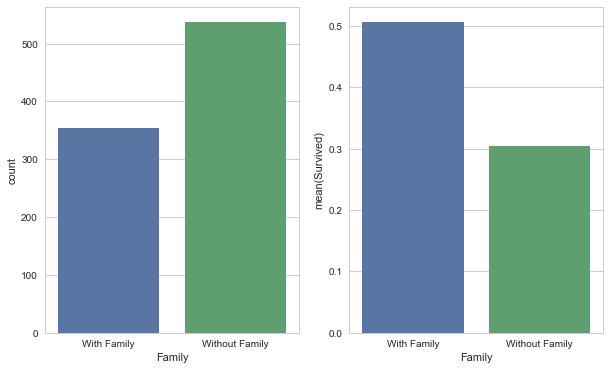

In [96]:
#Family 



#Lets combine Parch and SibSp to make one column as Family.

#This is to analyse if having family member will increase the survival chances or not.!


titanic_train['Family']= titanic_train["Parch"] + titanic_train["SibSp"]
titanic_train['Family'].loc[titanic_train['Family'] > 0 ] = 1
titanic_train['Family'].loc[titanic_train['Family'] > 0 ] == 0

titanic_test['Family']= titanic_test["Parch"] + titanic_test["SibSp"]
titanic_test['Family'].loc[titanic_test['Family'] > 0 ] = 1
titanic_test['Family'].loc[titanic_test['Family'] > 0 ] == 0


# Drop Parch and SibSp
titanic_train= titanic_train.drop(['SibSp', 'Parch'], axis=1)
titanic_test= titanic_test.drop(['SibSp', 'Parch'], axis=1)

#Plot

fig, (axis1,axis2) = plt.subplots(1,2,sharex=True, figsize=(10,6))

sns.countplot(x='Family', data=titanic_train, order=[1,0], ax=axis1)

#Average of those dont have family member

family_stat= titanic_train[["Family", "Survived"]].groupby(['Family'], as_index=False).mean()

sns.barplot(x= 'Family', y='Survived', data=family_stat, order=[1,0], ax= axis2)

axis1.set_xticklabels(["With Family", "Without Family"], rotation=0)





#### The Above bar graph tells: there are more people without family

### Survival by Gender and Age.
#### This graph shows how many men and women survived.
#### clearly by this hiostagram we can make out that survival rate of females is higher than male.

In [154]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-40


In [160]:

# Survival Percentage per sex
survival_rate("Sex","")

        total  survived  percentage
Sex                                
female    314       233       74.20
male      577       109       18.89


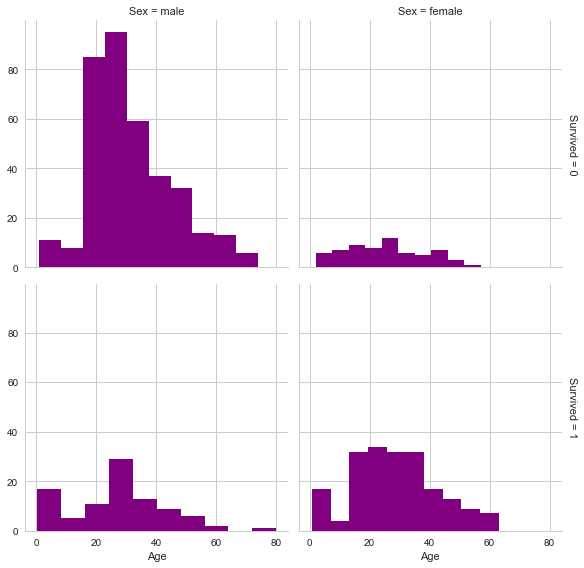

In [163]:
g = sns.FacetGrid(titanic_train,size=4, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple")
# g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()

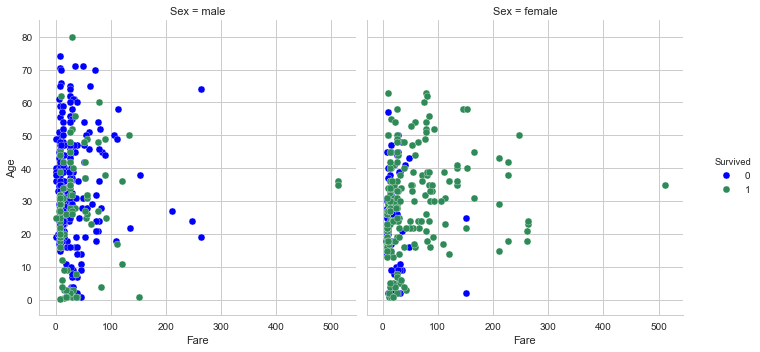

In [170]:
# Scatter plot for Survival by age and fare!
k = sns.FacetGrid(titanic_train, hue="Survived",size=5, col="Sex", margin_titles=True,
                  palette={0:"blue", 1:"seagreen"})
k=k.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()

#### Survival by Passenger class, Age and Gender

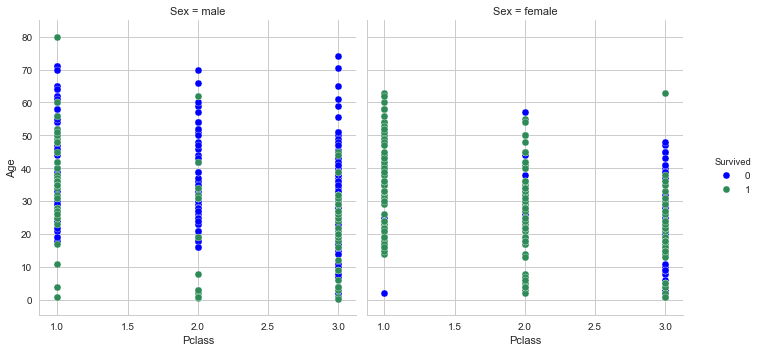

In [10]:
# Scatter plot for Survival by age and Gender and Pclass!
l = sns.FacetGrid(titanic_train, hue="Survived",size=5, col="Sex", margin_titles=True,
                  palette={0:"blue", 1:"seagreen"})
l=l.map(plt.scatter, "Pclass", "Age",edgecolor="w").add_legend()

### Survival by Passenger class, Age and Fare!  
#### we can understand from the scatterplot that there are more number of passengers survuived in 1st class than in anyother.
#### we can depict that there are more chance to survive if you are travelling in 1st class in titanic.

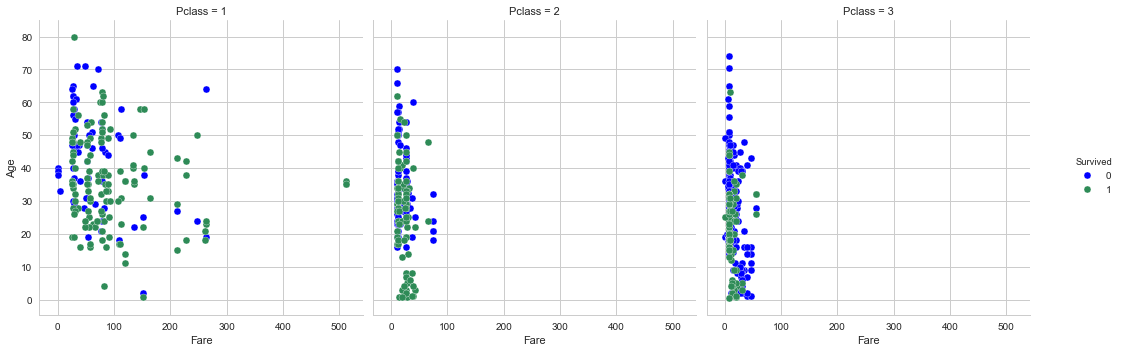

In [172]:
g = sns.FacetGrid(titanic_train, hue="Survived",size=5, col="Pclass", margin_titles=True,
                  palette={0:"blue", 1:"seagreen"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()

### Survival by Gender, Age and Fare
### Lower class females survived more than lower class male
### Upper class females survived more than upper class male.
### Females between Age: 20-40 survived more than males 20-40.
### 

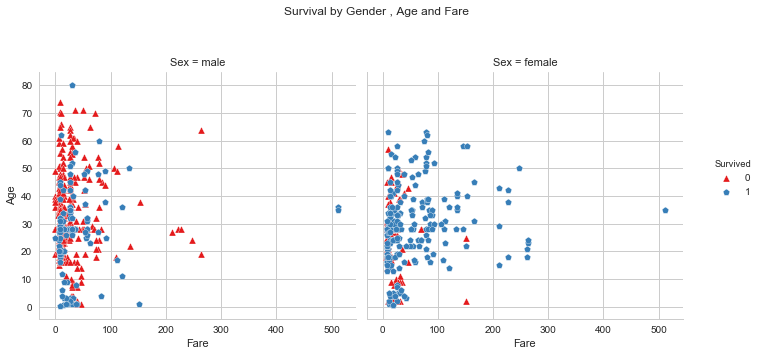

In [99]:
g = sns.FacetGrid(titanic_train, size=5, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "p"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare')


### Correleation between Fare and Survival!

Line2D(_line0)
Legend


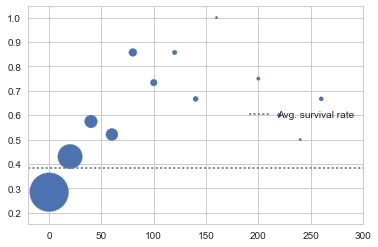

In [100]:
# Bubble size = # of people in that group

fare_range = np.arange(0,300,20)
fare_groups = pd.cut(titanic_train['Fare'], fare_range)
grouped_fare = titanic_train.groupby(fare_groups)['Survived'].mean()

# count()*3 -> just to make the bubble size bigger
num_people_fare_groups = titanic_train.groupby(fare_groups)['Survived'].count()*3
plt.scatter(fare_range[:len(fare_range)-1], grouped_fare,s=num_people_fare_groups.tolist())
plt.xlim(-20,300)
avg_survived(survived_ratio)

### Correleation between Fare, Survival and Age

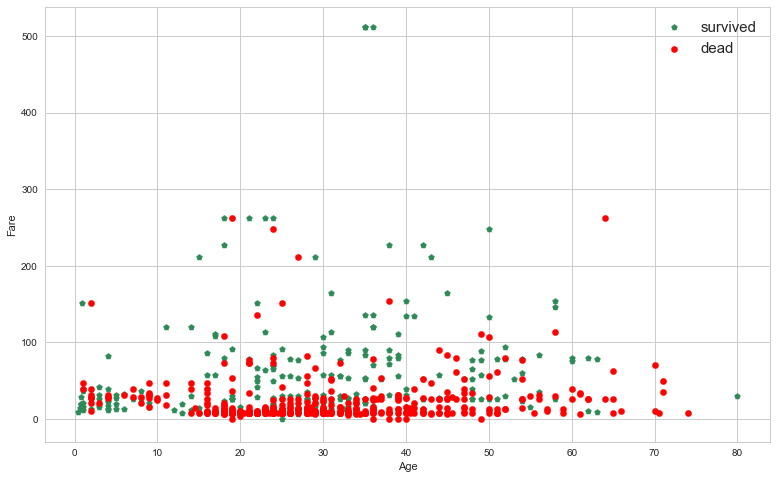

In [8]:
plt.figure(figsize=(13,8))
ax = plt.subplot()
ax.scatter(titanic_train[titanic_train['Survived']==1]['Age'],titanic_train[titanic_train['Survived']==1]['Fare'],c='seagreen',s=40,marker='p')
ax.scatter(titanic_train[titanic_train['Survived']==0]['Age'],titanic_train[titanic_train['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)


##### Regression:
##### Regression is a statistical measure used in finance, investing and other disciplines that attempts to determine the strength of the relationship between one dependent variable (usually denoted by Y) and a series of other changing variables (known as independent variables).


##### Logistic regression:
##### Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [20]:
train = pd.read_csv("C:/Users/arjun/Desktop/train.csv", dtype={"Age": np.float64}, )
test  = pd.read_csv("C:/Users/arjun/Desktop/test.csv", dtype={"Age": np.float64}, )

In [21]:
def harmonize_data(titanic):
    
    titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
    titanic["Age"].median()
    
    titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
    titanic.loc[titanic["Sex"] == "female", "Sex"] = 1
    
    titanic["Embarked"] = titanic["Embarked"].fillna("S")

    titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
    titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
    titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

    titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

    return titanic

In [22]:
def create_submission(alg, train, test, predictors, filename):

    alg.fit(train[predictors], train["Survived"])
    predictions = alg.predict(test[predictors])

    submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })
    
    submission.to_csv(filename, index=False)

In [23]:
train_data = harmonize_data(train)
test_data  = harmonize_data(test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

alg    = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(
    alg,
    train_data[predictors],
    train_data["Survived"],
    cv=3
)

print(scores.mean())

0.787878787879


C:\Users\arjun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

alg = RandomForestClassifier(
    random_state=1,
    n_estimators=150,
    min_samples_split=4,
    min_samples_leaf=2
)

scores = cross_validation.cross_val_score(
    alg,
    train_data[predictors],
    train_data["Survived"],
    cv=3
)

print(scores.mean())

0.820426487093


In [19]:
create_submission(alg, train_data, test_data, predictors, "titanic_proj_pred.csv")

NameError: name 'create_submission' is not defined

In [26]:
titanic_pred = pd.read_csv("C:/Users/arjun/Desktop/titanic_proj_pred.csv")


In [27]:
titanic_pred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [28]:
titanic_pred.sample(6)

,PassengerId,Survived
256,1148,0
71,963,0
302,1194,0
305,1197,1
299,1191,0
224,1116,1


In [43]:
# titanic_train.head()

In [42]:
titanic_train[['PassengerId','Survived']].sample(6)

,PassengerId,Survived
376,377,1
744,745,1
127,128,1
870,871,0
133,134,1
332,333,0
